## Import Libraries

In [ ]:
import numpy as np    # For array operations
import pandas as pd   # for storing pts in dataframe
import matplotlib.pyplot as plt   # for plotting Triangulated polygon
from tqdm import tqdm    # To check progress bar of the Algorithm 

# 1.Generate N-random points of polygon (Sorted-Anti-clock wise) 

In [109]:
def generate(n):
    return [list(x) for x in np.random.randint(1,500,size=(n,2))] 

def find_angle(p1,p2,p3):
    a=np.array([p1[0]-p2[0],p1[1]-p2[1]])
    b=np.array([p3[0]-p2[0],p3[1]-p2[1]])    
    inner = np.inner(a, b)
    norms = np.linalg.norm(a) * np.linalg.norm(b)

    cos = inner / norms
    rad_angle = np.arccos(np.clip(cos, -1.0, 1.0))
    deg_angle = np.rad2deg(rad_angle)
    if cos>0 and p1[1]>p2[1]:
        deg_angle=deg_angle
    elif cos>0 and p1[1]<p2[1]:
        deg_angle=-deg_angle    
    elif cos<0 and p1[1]>p2[1]:
        deg_angle=deg_angle      
    elif cos<0 and p1[1]<p2[1]:
          deg_angle=360-deg_angle     
    return deg_angle  

def sort_cyclic(lst):
    x_mid,y_mid=0,0
    for pt in lst:
        x_mid+=pt[0]
        y_mid+=pt[0]
    x_mid/=len(lst)
    y_mid/=len(lst)
    output=[]
    for pt in lst:
        p1=pt
        p2=x_mid,y_mid
        p3=[p2[0]+100,p2[1]]  
        deg_angle=find_angle(p1,p2,p3)
        output.append([deg_angle,pt])
    return [i[1] for i in sorted(output)]  

n=5                          # Enter (n=number of sides) to generate list of n points in Anticlockwise order          
pts=sort_cyclic(generate(n)) 
print(f'points={pts}')

points=[[431, 102], [201, 456], [177, 275], [96, 383], [18, 207]]


## Display n-sided generated polygon

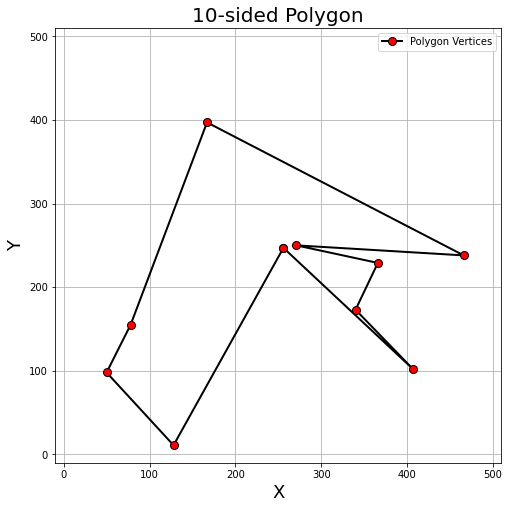

In [114]:
def PLOT(pts,diagonals=[]):          # PLOTTING FUNCTION TO DISPLAY POLYGONS AND TRIANGULATED POLYGONS
    pts.append(pts[0])
    x=[pt[0] for pt in pts]
    y=[pt[1] for pt in pts]

    plt.figure(figsize=(8,8))
    plt.plot(x,y,'black',label='Polygon Vertices',lw=2,marker='o',markersize=8,markerfacecolor='red')
    if diagonals!=[]:
        for x1,y1,x2,y2 in diagonals:
            x,y=[[x1,x2],[y1,y2]]  
            plt.plot(x,y,'g')
        plt.plot(x,y,'g',label='Non-Intersecting Diagonals')    
        plt.title(f'Triangulated {n}-sided Polygon',fontsize=20)  
    if diagonals==[]:
        plt.title(f'{n}-sided Polygon',fontsize=20)        
    plt.xlabel("X",fontsize=18)# coordinate labeling 
    plt.ylabel("Y",fontsize=18)  
    plt.axis([-10,510,-10,510])# range of axes 
    plt.grid()
    plt.legend()# according to legend 

n=10                            # Enter (n=number of sides) to generate list of n points in Anticlockwise order          
pts=sort_cyclic(generate(n))      
PLOT(pts)     # PLOT the points

# 2.All Utility Functions

In [112]:
def convert_to_df(pts):
    x = [i[0] for i in pts]
    y = [i[1] for i in pts]
    df = pd.DataFrame({'x': x, 'y': y})
    return df  
    
def get_edges(pts):    # form list of all edges in anticlock wise order
    res=[]
    res2=[]
    for i in range(len(pts)):
        if i==0:
            res.append((pts[len(pts)-1][0],pts[len(pts)-1][1],pts[0][0],pts[0][1]))  
            res2.append([pts[len(pts)-1],pts[0]])
        elif i!=0: 
            res.append((pts[i-1][0],pts[i-1][1],pts[i][0],pts[i][1]))
            res2.append([pts[i-1],pts[i]])
    output=pd.DataFrame(res,columns=['x','y','xend','yend']) 
    return res2,output

def find_prev_post(pt1,pts):   # To find previous and next point for the current points
    for i,pt in enumerate(pts):
        if pt==pt1:
            if i==0:
                prev=pts[-1]
                post=pts[1]
            elif i!=0 and i!=len(pts)-1:
                prev=pts[i-1]
                post=pts[i+1]
            elif i==len(pts)-1:
                prev=pts[i-1]
                post=pts[0]      
    return prev,post  

def check_same_side(p_prev,p_post,pair1):   # for checking if 2 points ar on same side, for IN CONE TEST
    a=np.array(p_prev)-np.array(pair1[0])
    b=np.array(p_post)-np.array(pair1[0])
    res1=np.cross(a,b)

    a=np.array(p_prev)-np.array(pair1[0])
    b=np.array(pair1[1])-np.array(pair1[0])
    res2=np.cross(a,b)   

    a=np.array(p_post)-np.array(pair1[0])
    b=np.array(p_prev)-np.array(pair1[0])
    res3=np.cross(a,b)

    a=np.array(p_post)-np.array(pair1[0])
    b=np.array(pair1[1])-np.array(pair1[0])
    res4=np.cross(a,b)   
    if ((res1>0 and res2>0)or(res1<0 and res2<0))and((res3>0 and res4>0)or(res3<0 and res4<0)) :
        return True
    else:
        return False        

def check_convex(p_prev,p,p_post):    # To check if the vertex is convex or not
    a=np.array(p_prev)-np.array(p)
    b=np.array(p_post)-np.array(p)
    if np.cross(a,b)>0:    # using left on check
        return False
    else:
        return True   

def check_intersection(pair1,pair2):   # To check if 2 pairs of lines intersect or not
    q1=pair2[0]
    q2=pair2[1]

    a=np.array(pair1[1])-np.array(pair1[0])
    b1=np.array(q1)-np.array(pair1[0])
    b2=np.array(q2)-np.array(pair1[0])
    res1=np.cross(a,b1)
    res2=np.cross(a,b2)

    q1=pair1[0]
    q2=pair1[1]

    a=np.array(pair2[1])-np.array(pair2[0])
    b1=np.array(q1)-np.array(pair2[0])
    b2=np.array(q2)-np.array(pair2[0])
    res3=np.cross(a,b1)
    res4=np.cross(a,b2)
                           # 4 times cross product taken to get res1, res2, res3, res4
    if ((res1>0 and res2<0)or(res1<0 and res2>0)) and ((res3>0 and res4<0)or(res3<0 and res4>0)):  # condition for LEFT ON Test
        return True
    else:
        return False                          

def check_internal(pair1,p_prev,p_post):  # To check if Diagonal is internal or not     
    if  (check_convex(p_prev,pair1[0],p_post)==True and check_same_side(p_prev,p_post,pair1)==True) or (check_convex(p_prev,pair1[0],p_post)==False and check_same_side(p_prev,p_post,pair1)==False):   
        #print(f"convex={check_convex(p_prev,pair1[0],p_post)}")                                                                        
        return True 
    else:
        return False         

def Triangulate(pts):   # Triangulate Function
    valid_pairs=[]  
    check_intersection_pairs,_=get_edges(pts)   # initially all edges will be there to check intersection with
    for i,pt in tqdm(enumerate(pts),total=len(pts)):  # selecting 1st point of pair1
        first_pt=pt
        
        if i==0:                          #neglecting immediate neighbors for selecting 2nd point of the pair
            neglect1_index=len(pts)-1
            neglect2_index=0
        elif i!=0 and i!=len(pts)-1:
            neglect1_index=i-1
            neglect2_index=i+1
        elif i==len(pts)-1:
            neglect1_index=i-1
            neglect_index2=0  
           
        other_pts=[x for j,x in enumerate(pts) if j!=neglect1_index and j!=neglect2_index] 

        pairs=[[first_pt,other_pt] for other_pt in other_pts]

        for i,pair1 in enumerate(pairs):   #looping over all pairs possible
             count_pairs=len(check_intersection_pairs)  
             count=0        
             for pair2 in check_intersection_pairs:   # check (intersection and internal case) for every pair1 with all pairs present in check_intersection_pairs list
                    prev_pt1,post_pt1=find_prev_post(pair1[0],pts)
                    prev_pt2,post_pt2=find_prev_post(pair1[1],pts)
                    if check_intersection(pair1,pair2)==False and check_internal(pair1,prev_pt1,post_pt1)==True and check_internal([pair1[1],pair1[0]],prev_pt2,post_pt2)==True:
                        count+=1  # to keep count of how many times the pair has not intersected
             if count==count_pairs:   # if pair1 is perfect digonal without intersecting all previous valid pairs and also internal, then it is also a valid pair of diagonal for triangulation
                 if (pair1[0][0],pair1[0][1],pair1[1][0],pair1[1][1]) not in valid_pairs and (pair1[1][0],pair1[1][1],pair1[0][0],pair1[0][1]) not in valid_pairs and pair1[0]!=pair1[1]:             
                     valid_pairs.append((pair1[0][0],pair1[0][1],pair1[1][0],pair1[1][1]))
                     check_intersection_pairs.append(pair1)  # add new digonal(pair1) to check list, as from next loop it will also be needed to check for intersection
    print(end='\n')
    print(f'Total Non Intersecting Diagonals={len(valid_pairs)}')
    return valid_pairs 

# 3.Triangulation:
### Each time we give input (n) ,a random Triangulated polygon will be generated with:

###*Total sides=n 
###*Total Diagonals=(n-3) 

### N=5

100%|██████████| 5/5 [00:00<00:00, 98.43it/s]



Total Non Intersecting Diagonals=2


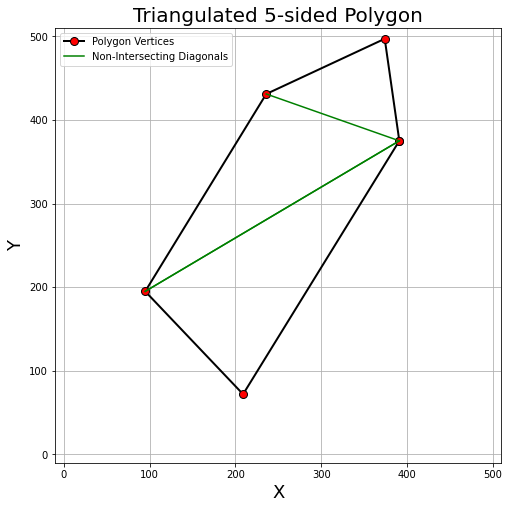

In [115]:
def Generator(n):
    pts=sort_cyclic(generate(n))  # pts in cyclic order(Anti clock wise)
    diagonals=Triangulate(pts)   # Non intersecting diagonals found after triangulation  
    _,edges=get_edges(pts)    # polygon edges
    df=pd.DataFrame(diagonals,columns=['x','y','xend','yend'])
    df=pd.concat([df,edges])   # convert into pandas data frame
    return pts,diagonals,df


n=5      # GIVE ANY INPUT -N
pts,diagonals,df=Generator(n)
PLOT(pts,diagonals)

### N=10

100%|██████████| 10/10 [00:00<00:00, 22.17it/s]



Total Non Intersecting Diagonals=7


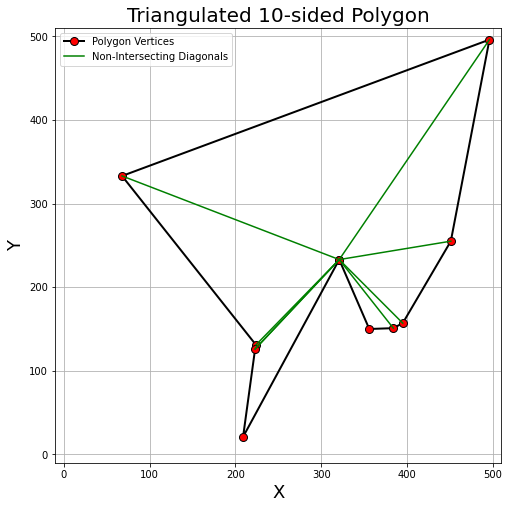

In [116]:
n=10      # GIVE ANY INPUT -N
pts,diagonals,df=Generator(n)
PLOT(pts,diagonals)

### N=20

100%|██████████| 20/20 [00:04<00:00,  4.41it/s]



Total Non Intersecting Diagonals=18


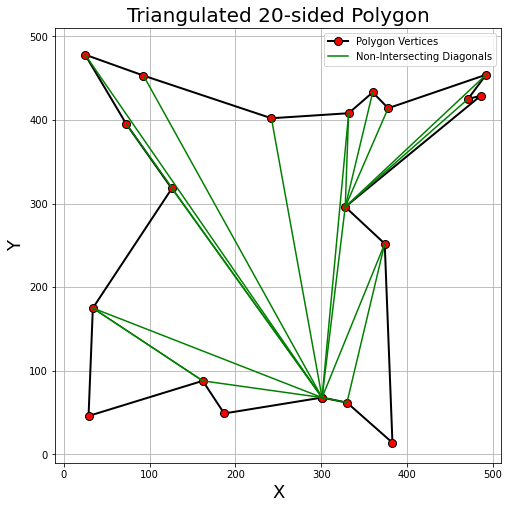

In [117]:
n=20      # GIVE ANY INPUT -N
pts,diagonals,df=Generator(n)
PLOT(pts,diagonals)

### N=30

100%|██████████| 30/30 [00:15<00:00,  1.90it/s]



Total Non Intersecting Diagonals=27


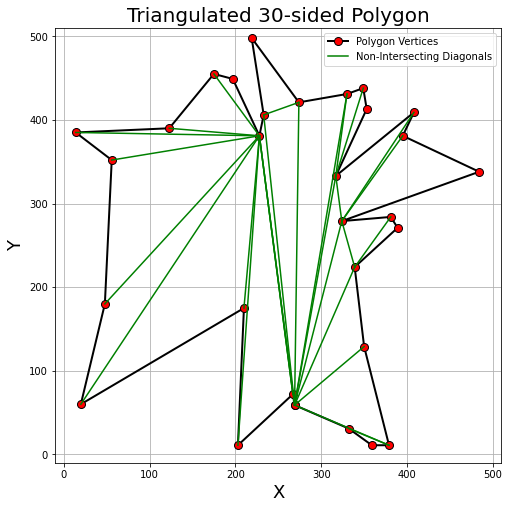

In [118]:
n=30      # GIVE ANY INPUT -N
pts,diagonals,df=Generator(n)
PLOT(pts,diagonals)

### N=40

100%|██████████| 40/40 [00:35<00:00,  1.13it/s]



Total Non Intersecting Diagonals=37


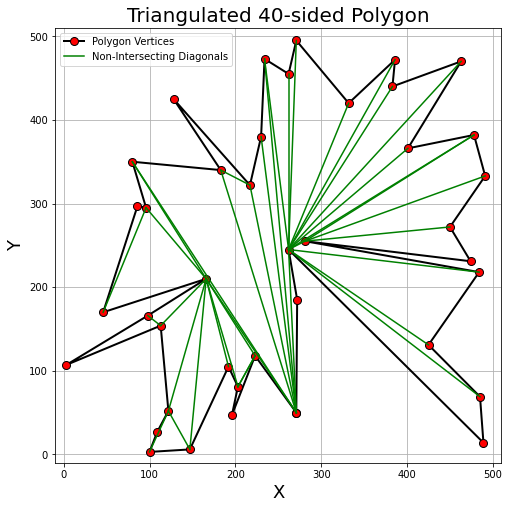

In [ ]:
n=40      # GIVE ANY INPUT -N
pts,diagonals,df=Generator(n)
PLOT(pts,diagonals)

### N=50

100%|██████████| 50/50 [01:11<00:00,  1.42s/it]



Total Non Intersecting Diagonals=48


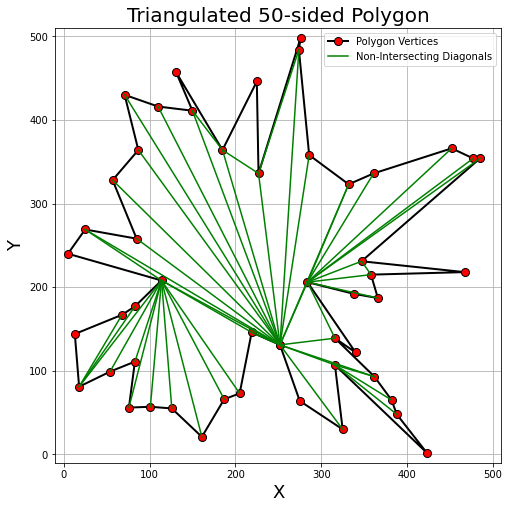

In [ ]:
n=50      # GIVE ANY INPUT -N
pts,diagonals,df=Generator(n)
PLOT(pts,diagonals)

### N=100

100%|██████████| 100/100 [09:21<00:00,  5.61s/it]



Total Non Intersecting Diagonals=97


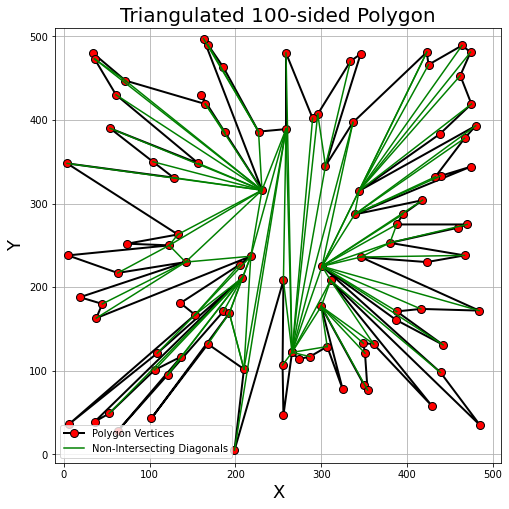

In [ ]:
n=100      # GIVE ANY INPUT -N
pts,diagonals,df=Generator(n)
PLOT(pts,diagonals)